In [3]:
# For commands
import os
import time
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings('ignore')

# For array manipulation
import numpy as np
import pandas as pd
import pandas.util.testing as tm

# For visualization
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import cv2
import imageio as io
from pylab import *
from sklearn.manifold import TSNE

#For model performance
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import cosine_similarity
import joblib

#For model training
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam, Adagrad, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
from keras.models import load_model
from keras.preprocessing import image
import tensorflow as tf

In [4]:
#path to dataset similarity-check-data
file_path = os.listdir('dataset/')
print(len(file_path))

4738


In [5]:
train_files, test_files = train_test_split(file_path, test_size = 0.2)
print(len(train_files))
print(len(test_files))

3790
948


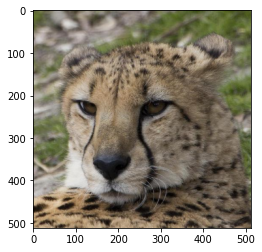

In [6]:
path_file="dataset/"
img = cv2.imread(path_file+train_files[4])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img);

In [7]:
def image2array(file_array):

    image_array = []
    for path in tqdm(file_array):
        img = cv2.imread(path_file+path)
        img = cv2.resize(img, (224,224))
        image_array.append(np.array(img))
    image_array = np.array(image_array)
    image_array = image_array.reshape(image_array.shape[0], 224, 224, 3) 
    image_array = image_array.astype('float32')
    image_array /= 255 
    
    return np.array(image_array)

In [8]:
train_data = image2array(train_files)
print("Length of training dataset:",train_data.shape)
test_data = image2array(test_files)
print("Length of test dataset:",test_data.shape)

  0%|          | 0/3790 [00:00<?, ?it/s]

Length of training dataset: (3790, 224, 224, 3)


  0%|          | 0/948 [00:00<?, ?it/s]

Length of test dataset: (948, 224, 224, 3)


In [9]:
def encoder_decoder_model():

    #Encoder 
    model = Sequential(name='Convolutional_AutoEncoder_Model')
    model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',input_shape=(224, 224, 3),padding='same', name='Encoding_Conv2D_1'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='same', name='Encoding_MaxPooling2D_1'))
    model.add(Conv2D(128, kernel_size=(3, 3),strides=1,activation='relu',padding='same', name='Encoding_Conv2D_2'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='same', name='Encoding_MaxPooling2D_2'))
    model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same', name='Encoding_Conv2D_3'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='same', name='Encoding_MaxPooling2D_3'))
    model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same', name='Encoding_Conv2D_4'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2,padding='valid', name='Encoding_MaxPooling2D_4'))
    model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same', name='Encoding_Conv2D_5'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2,padding='valid', name='Encoding_MaxPooling2D_5'))
    
    
    #Decoder
    model.add(Conv2D(512, kernel_size=(3, 3),  activation='relu', padding='same', name='Decoding_Conv2D_1'))
    model.add(UpSampling2D((2, 2), name='Decoding_Upsamping2D_1'))
    model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same', name='Decoding_Conv2D_2'))
    model.add(UpSampling2D((2, 2), name='Decoding_Upsamping2D_2'))
    model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same',name='Decoding_Conv2D_3'))
    model.add(UpSampling2D((2, 2),name='Decoding_Upsamping2D_3'))
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same',name='Decoding_Conv2D_4'))
    model.add(UpSampling2D((2, 2),name='Decoding_Upsamping2D_4'))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same',name='Decoding_Conv2D_5'))
    model.add(UpSampling2D((2, 2),name='Decoding_Upsamping2D_5'))
    
    model.add(Conv2D(3, kernel_size=(3, 3), padding='same',activation='relu',name='Decoding_Output'))
    
    return model

In [10]:
model = encoder_decoder_model()
model.summary()

2022-11-23 12:03:10.485278: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-23 12:03:10.610878: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-23 12:03:10.612160: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-23 12:03:10.614444: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "Convolutional_AutoEncoder_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Encoding_Conv2D_1 (Conv2D)   (None, 224, 224, 64)      1792      
_________________________________________________________________
Encoding_MaxPooling2D_1 (Max (None, 112, 112, 64)      0         
_________________________________________________________________
Encoding_Conv2D_2 (Conv2D)   (None, 112, 112, 128)     73856     
_________________________________________________________________
Encoding_MaxPooling2D_2 (Max (None, 56, 56, 128)       0         
_________________________________________________________________
Encoding_Conv2D_3 (Conv2D)   (None, 56, 56, 256)       295168    
_________________________________________________________________
Encoding_MaxPooling2D_3 (Max (None, 28, 28, 256)       0         
_________________________________________________________________
Encoding_Conv2D_4 (Conv2D)   (None,

In [11]:
def plot_(x,y1,y2,row,col,ind,title,xlabel,ylabel,label,isimage=False,color='r'):

    """
    This function is used for plotting images and graphs (Visualization of end results of model training)
    Arguments:
    x - (np.ndarray or list) - an image array
    y1 - (list) - for plotting graph on left side.
    y2 - (list) - for plotting graph on right side.
    row - (int) - row number of subplot
    col - (int) - column number of subplot
    ind - (int) - index number of subplot
    title - (string) - title of the plot 
    xlabel - (list) - labels of x axis
    ylabel - (list) - labels of y axis
    label - (string) - for adding legend in the plot
    isimage - (boolean) - True in case of image else False
    color - (char) - color of the plot (prefered green for training and red for testing).
    """
    
    plt.subplot(row,col,ind)
    if isimage:
        plt.imshow(x)
        plt.title(title)
        plt.axis('off')
    else:
        plt.plot(y1,label=label,color='g'); plt.scatter(x,y1,color='g')
        if y2!='': plt.plot(y2,color=color,label='validation'); plt.scatter(x,y2,color=color)
        plt.grid()
        plt.legend()
        plt.title(title); plt.xlabel(xlabel); plt.ylabel(ylabel)

In [12]:
model.compile(optimizer = Adam(learning_rate=0.0001), loss='mse') 

early_stopping = EarlyStopping(monitor='val_loss', mode='min',verbose=1, patience = 3, min_delta=0.0001) 
checkpoint = ModelCheckpoint('encoder_model.h5', monitor='val_loss', mode='min', save_best_only=True)

model.fit(train_data, train_data, epochs=25, batch_size=16,validation_data=(test_data,test_data),callbacks=[early_stopping,checkpoint]) 

2022-11-23 12:03:14.037174: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 2282004480 exceeds 10% of free system memory.
2022-11-23 12:03:17.397166: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 2282004480 exceeds 10% of free system memory.
2022-11-23 12:03:20.654161: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 2282004480 exceeds 10% of free system memory.
2022-11-23 12:03:22.832388: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 2282004480 exceeds 10% of free system memory.
2022-11-23 12:03:25.214312: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25


2022-11-23 12:03:27.636281: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


237/237 [==============================] - ETA: 0s - loss: 0.0401

2022-11-23 12:03:57.797713: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 570802176 exceeds 10% of free system memory.


237/237 [==============================] - 38s 118ms/step - loss: 0.0401 - val_loss: 0.0188
Epoch 2/25
237/237 [==============================] - 23s 96ms/step - loss: 0.0176 - val_loss: 0.0164
Epoch 3/25
237/237 [==============================] - 23s 96ms/step - loss: 0.0157 - val_loss: 0.0148
Epoch 4/25
237/237 [==============================] - 23s 96ms/step - loss: 0.0145 - val_loss: 0.0138
Epoch 5/25
237/237 [==============================] - 23s 96ms/step - loss: 0.0134 - val_loss: 0.0131
Epoch 6/25
237/237 [==============================] - 23s 96ms/step - loss: 0.0127 - val_loss: 0.0125
Epoch 7/25
237/237 [==============================] - 23s 96ms/step - loss: 0.0122 - val_loss: 0.0124
Epoch 8/25
237/237 [==============================] - 23s 96ms/step - loss: 0.0119 - val_loss: 0.0118
Epoch 9/25
237/237 [==============================] - 23s 96ms/step - loss: 0.0114 - val_loss: 0.0118
Epoch 10/25
237/237 [==============================] - 23s 95ms/step - loss: 0.0114 - val_lo

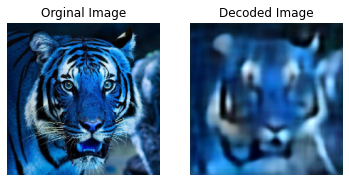

In [13]:
sample_image = train_data[11]

sample_image = np.expand_dims(sample_image,axis=0)
image = model.predict(sample_image)
plot_(sample_image[0,:,:,:],'','',1,2,1,"Orginal Image","","","",True)
plot_(image[0,:,:],'','',1,2,2,"Decoded Image","","","",True)

plt.show()

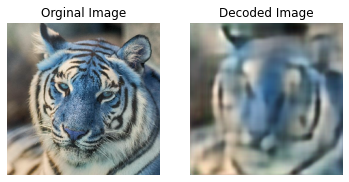

In [14]:
sample_image = train_data[15]
sample_image = np.expand_dims(sample_image,axis=0)
image = model.predict(sample_image)
plot_(train_data[15],'','',1,2,1,"Orginal Image","","","",True)
plot_(image[0,:,:],'','',1,2,2,"Decoded Image","","","",True)
plt.show()

In [15]:
from keras import backend as K
def feature_extraction(model, data, layer = 4):

    """
    Creating a function to run the initial layers of the encoder model. (to get feature extraction from any layer of the model)
    Arguments:
    model - (Auto encoder model) - Trained model
    data - (np.ndarray) - list of images to get feature extraction from trained model
    layer - (int) - from which layer to take the features(by default = 4)
    Returns:
    pooled_array - (np.ndarray) - array of extracted features of given images
    """

    encoded = K.function([model.layers[0].input],[model.layers[layer].output])
    encoded_array = encoded([data])[0]
    pooled_array = encoded_array.max(axis=-1)
    return encoded_array

In [16]:
encoded = feature_extraction(model,train_data[:10],10)

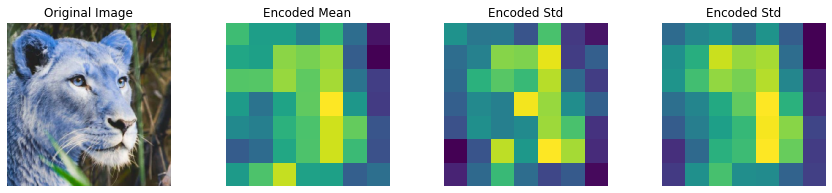

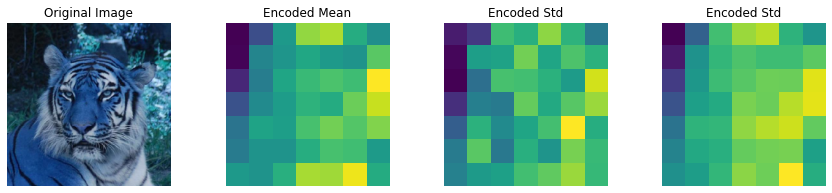

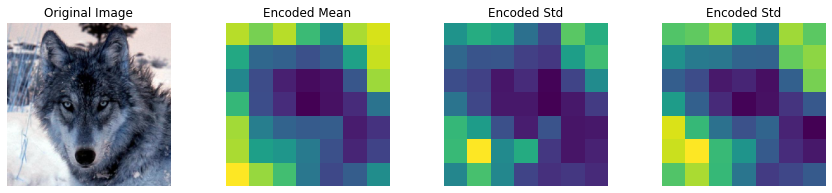

In [17]:
for index in [2,7,9]:   # 3 random images
    plt.figure(figsize=(15,3))
    plot_(train_data[index],'','',1,4,1,"Original Image","","",'',True)
    plot_(encoded[index].mean(axis=-1),'','',1,4,2,"Encoded Mean","","",'',True)
    plot_(encoded[index].max(axis=-1),'','',1,4,3,"Encoded Std","","",'',True)
    plot_(encoded[index].std(axis=-1),'','',1,4,4,"Encoded Std","","",'',True)
    plt.show()

In [18]:
def get_batches(data, batch_size=1000):

    """
    Taking batch of images for extraction of images.
    Arguments:
    data - (np.ndarray or list) - list of image array to get extracted features.
    batch_size - (int) - Number of images per each batch
    Returns:
    list - extracted features of each images
    """

    if len(data) < batch_size:
        return [data]
    n_batches = len(data) // batch_size
    
    # If batches fit exactly into the size of df.
    if len(data) % batch_size == 0:
        return [data[i*batch_size:(i+1)*batch_size] for i in range(n_batches)]   

    # If there is a remainder.
    else:
        return [data[i*batch_size:min((i+1)*batch_size, len(data))] for i in range(n_batches+1)]

In [19]:
d = np.concatenate([train_data,test_data],axis=0)
print(d.shape)
X_encoded = []
i=0
# Iterate through the full training set.
for batch in get_batches(d, batch_size=300):
    i+=1
    # This line runs our pooling function on the model for each batch.
    X_encoded.append(feature_extraction(model, batch,10))
    
X_encoded = np.concatenate(X_encoded)
print(X_encoded.shape)
X_encoded_reshape = X_encoded.reshape(X_encoded.shape[0], X_encoded.shape[1]*X_encoded.shape[2]*X_encoded.shape[3])
print('Encoded shape:', X_encoded_reshape.shape)
lis=train_files
lis.extend(test_files)
print(len(lis))
transform = TSNE 
trans = transform(n_components=2) 
values = trans.fit_transform(X_encoded_reshape) 

(4738, 224, 224, 3)
(4738, 7, 7, 512)
Encoded shape: (4738, 25088)
4738


if Number of clusters: 2


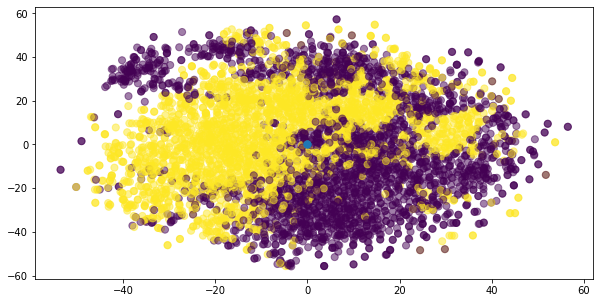

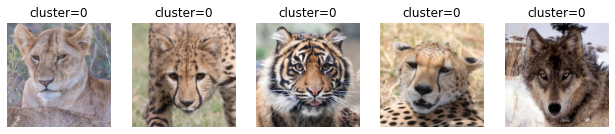

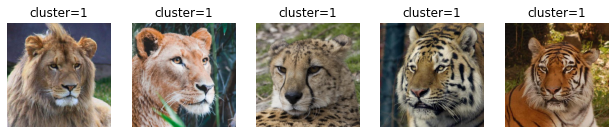


if Number of clusters: 3


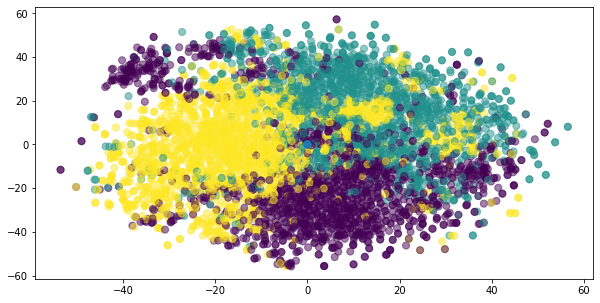

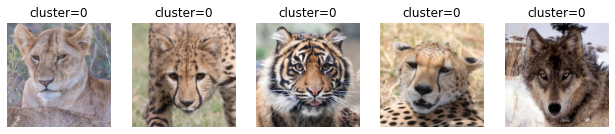

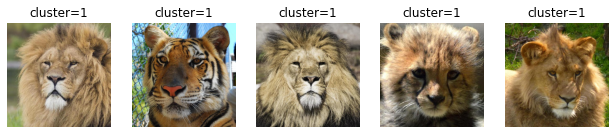

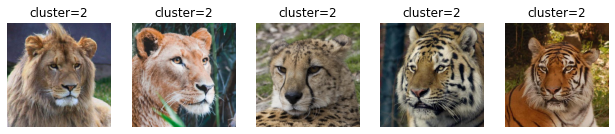


if Number of clusters: 4


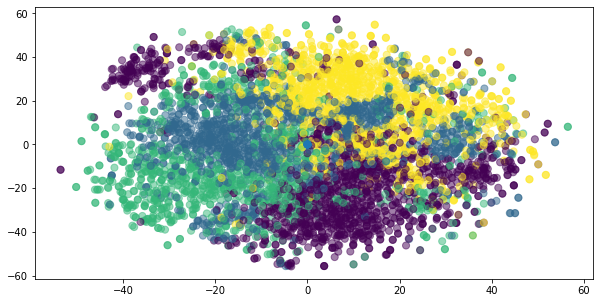

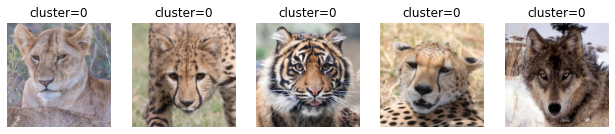

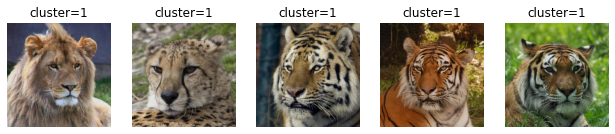

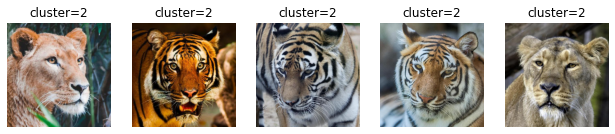

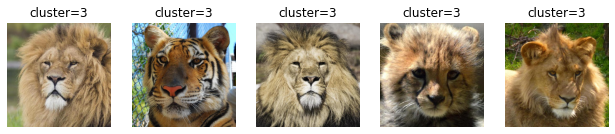


if Number of clusters: 5


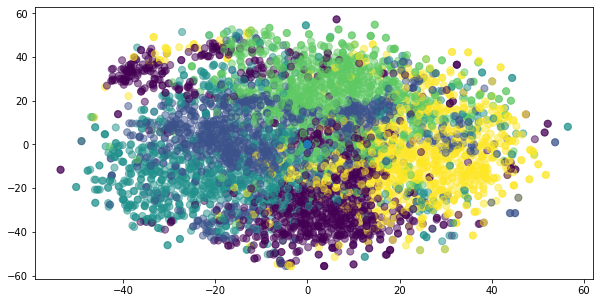

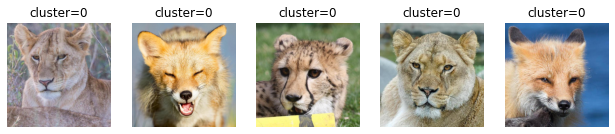

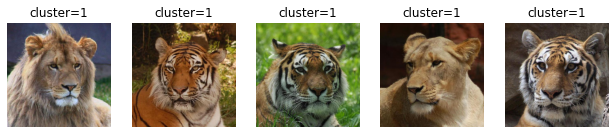

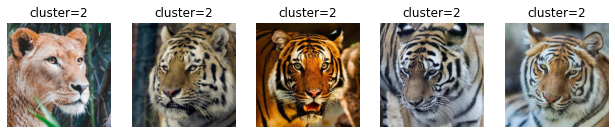

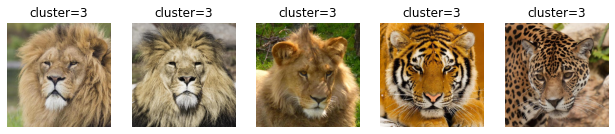

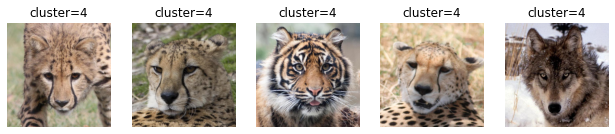

In [20]:
K = [2,3,4,5]
for k in K:
    print("if Number of clusters: "+str(k))
    kmeans = KMeans(n_clusters = k, random_state=0).fit(X_encoded_reshape)
    labels=kmeans.labels_
    centroids = kmeans.cluster_centers_
    plt.figure(figsize=(10,5)) 
    plt.subplot(1,1,1)
    plt.scatter(values[:,0], values[:,1], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
    plt.scatter(centroids[:, 0], centroids[:, 1], c=None, s=50)
    plt.show()
    for row in range(k): 
        iter=0
        plt.figure(figsize=(13,3))
        for i,iterator in enumerate(labels):
            if iterator == row:
                img = cv2.imread(path_file+lis[i])
                img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                plot_(img,"","",1,6,iter+1,"cluster="+str(row),"","","",True)
                iter+=1
            if iter>=5: break
        plt.show()
    print() 

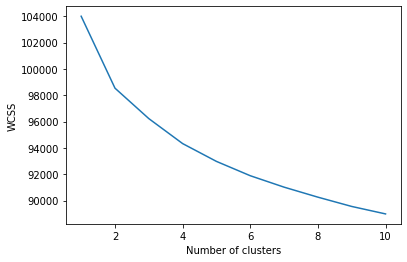

In [21]:
from sklearn.cluster import KMeans
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_encoded_reshape) 
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [27]:
kmeans = KMeans(n_clusters = 7, random_state=0).fit(X_encoded_reshape)
labels=kmeans.labels_
centroids = kmeans.cluster_centers_

In [23]:
clusters_features = []
cluster_files=[]
for i in [0,1,2,3,4,5,6,7]:
    i_cluster = []
    i_labels=[]
    for iter,j in enumerate(kmeans.labels_):
        if j==i:
            i_cluster.append(X_encoded_reshape[iter])
            i_labels.append(lis[iter])
    i_cluster = np.array(i_cluster)
    clusters_features.append(i_cluster)
    cluster_files.append(i_labels)

In [24]:
labels=[]
data=[]
files=[]
for iter,i in enumerate(clusters_features):
    data.extend(i)
    labels.extend([iter for i in range(i.shape[0])])
    files.extend(cluster_files[iter])
print(np.array(labels).shape)
print(np.array(data).shape)
print(np.array(files).shape)

(4738,)
(4738, 25088)
(4738,)


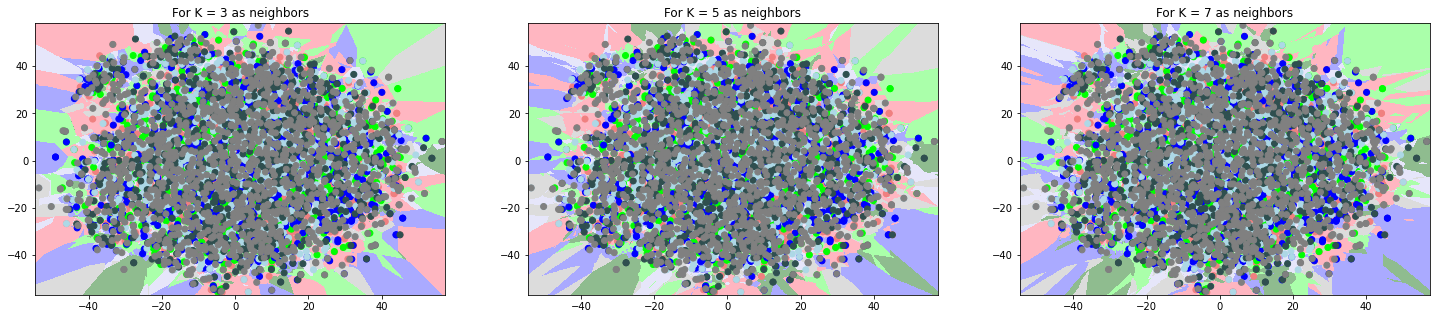

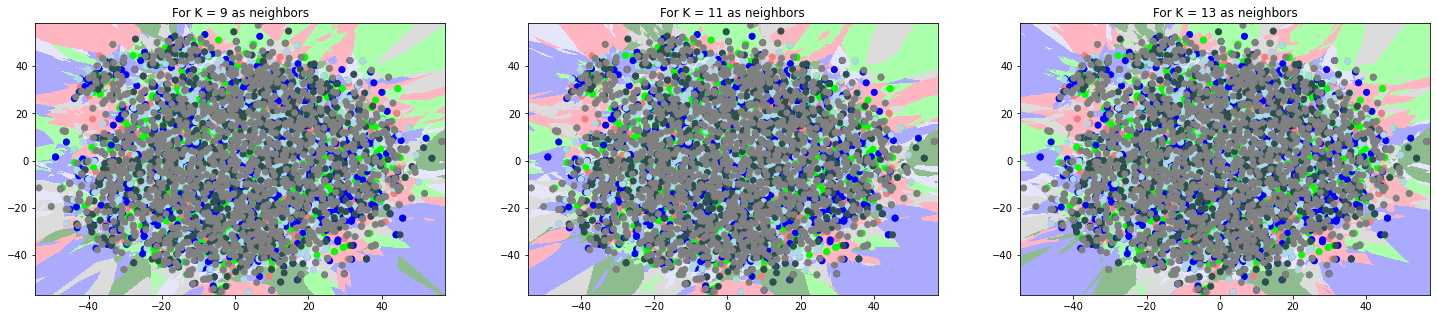

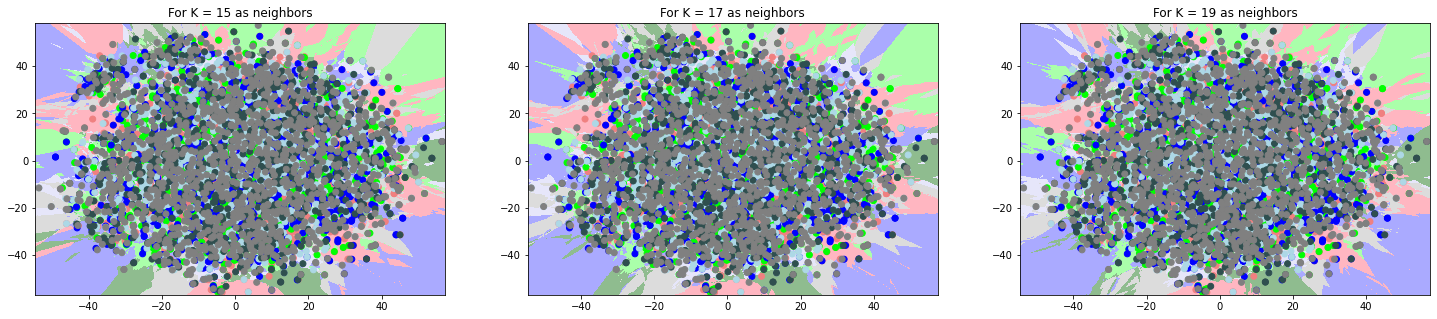

In [25]:
from matplotlib.colors import ListedColormap
for i in [[3,5,7],[9,11,13],[15,17,19]]:
    plt.figure(figsize=(25,5))
    for iter,j in enumerate(i):
        n_neighbors = j
        X = values  
        y = labels
        h = .09  # step size in the mesh
        cmap_light = ListedColormap(['#FFB6C1', '#AAFFAA', '#AAAAFF','#E6E6FA','#8FBC8F','#DCDCDC'])
        cmap_bold = ListedColormap(['#F08080', '#00FF00', '#0000FF','#ADD8E6','#2F4F4F','#808080'])
        clf = KNeighborsClassifier(n_neighbors)
        clf.fit(X, y)

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        plt.subplot(1,3,iter+1)
        Z = Z.reshape(xx.shape)
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

        # Plot also the training points 
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title("For K = {} as neighbors".format(j))
    plt.show()  

In [26]:
knn = KNeighborsClassifier(n_neighbors=6,algorithm='ball_tree',n_jobs=-1)
knn.fit(np.array(data),np.array(labels))

KNeighborsClassifier(algorithm='ball_tree', n_jobs=-1, n_neighbors=6)

In [28]:
def results_(query,result):
    
    """
    Plotting the N similar images from the dataset with query image.
    Arguments:
    query - (string) - filename of the query image
    result - (list) - filenames of similar images
    """

    def read(img):
        image = cv2.imread(path_file+img)
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        return image
    plt.figure(figsize=(10,5))
    if type(query)!=type(30):
        plot_(query,"","",1,1,1,"Query Image","","","",True)
    else:
        plot_(read(files[query]),"","",1,1,1,"Query Image "+files[query],"","","",True)
    plt.show()
    plt.figure(figsize=(20,5))
    for iter,i in enumerate(result):
        plot_(read(files[i]),"","",1,len(result),iter+1,files[i],"","","",True)
    plt.show()

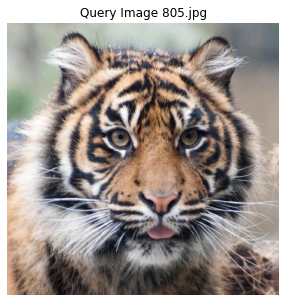

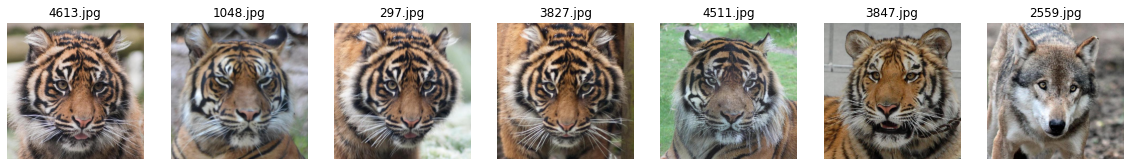

In [29]:
num = 1 #datapoint
res = knn.kneighbors(data[num].reshape(1,-1),return_distance=True,n_neighbors=8)
results_(num,list(res[1][0])[1:])

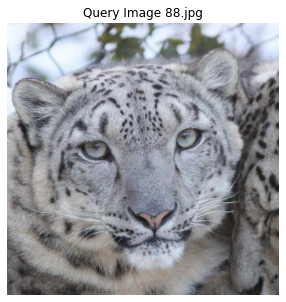

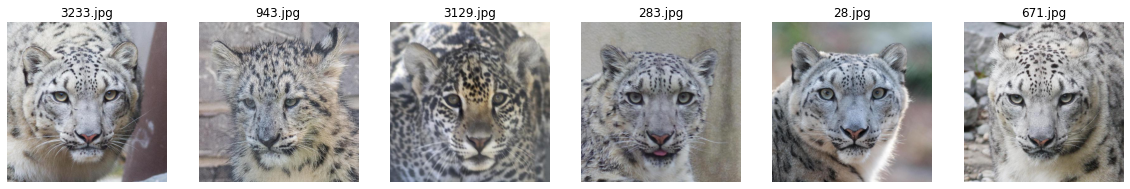

In [32]:
num = 14 #datapoint
res = knn.kneighbors(data[num].reshape(1,-1),return_distance=True,n_neighbors=7)
results_(num,list(res[1][0])[1:])